In [1]:
import ccxt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt

import json
import time
import os
import sys

In [2]:
src_path = '../src/'
sys.path.append(os.path.abspath(src_path))
import func_get
import func_signal
import func_backtest

In [3]:
start_ts = time.time()

In [4]:
interval_dict = {
    '1m': 1,
    '5m': 5,
    '15m': 15,
    '30m': 30,
    '1h': 60,
    '2h': 120,
    '4h': 240,
    '1d': 1440
}

In [5]:
with open('../../../_keys/ftx/ftx_read_keys.json') as keys_file:
    keys_dict = json.load(keys_file)
    
exchange = ccxt.ftx({'apiKey': keys_dict['apiKey'],
                     'secret': keys_dict['secret'],
                     'enableRateLimit': True})

### Config

In [6]:
project_name = 'cryptoris_30m'

In [7]:
start_date = dt.datetime(2022, 1, 1)
start_hour = 0
end_date = dt.datetime.today() - dt.timedelta(days=1)
reinvest_profit_flag = True

In [8]:
config_params = {
    'safety_ohlcv_range': 1000,
    'action_timeframe': '30m',
    'target_side': ['buy', 'sell'],
    'base': {
        'symbol': ['ETH-PERP', 'SOL-PERP', 'LUNA-PERP'],
        'open': {
            '30m': {
                'ema': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 200,
                    'revert': False
                },
                'supertrend': {
                    'check': ['check_signal_side_change'],
                    'look_back': 1,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                },
                'wt': {
                    'check': ['check_signal_band'],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }
            },
            '1h': {
                'ema': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 200,
                    'revert': False
                },
                'supertrend': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                },
                'wt': {
                    'check': ['check_signal_band'],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }        
            }    
            
        },
        'close': {
            '30m': {
                'supertrend': {
                    'check': ['check_signal_side'],
                    'look_back': 0,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                },
                'wt': {
                    'check': ['check_signal_band'],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }    
            }
        }
    },
    'lead': {
        'symbol': ['BTC-PERP'],
        'open': {
            '30m': {
                'wt': {
                    'check': ['check_signal_band'],
                    'trigger': 'inner',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 53,
                    'oversold': -53,
                    'revert': False
                }
            }
        },
        'close': {
        }
    },
    'tp': {
        'stop_percent': 50,
        'price_percent': 5,
        'signal': None,
    },
    'sl': {
        'stop_percent': 50,
        'price_percent': None,
        'signal': {
            'timeframe': '30m',
            'signal': {
                'supertrend': {
                    'look_back': 0,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                }
            }
        }
    },
    'action_percent': 10,
    'leverage': 5,
    'taker_fee_percent': 0.07
}

### Get data

In [9]:
ohlcv_df_dict = func_get.get_data(exchange, start_date, end_date, start_hour, interval_dict, config_params)

base: timeframe 1/2 symbol 1/3 date 1/161
base: timeframe 1/2 symbol 1/3 date 2/161
base: timeframe 1/2 symbol 1/3 date 3/161
base: timeframe 1/2 symbol 1/3 date 4/161
base: timeframe 1/2 symbol 1/3 date 5/161
base: timeframe 1/2 symbol 1/3 date 6/161
base: timeframe 1/2 symbol 1/3 date 7/161
base: timeframe 1/2 symbol 1/3 date 8/161
base: timeframe 1/2 symbol 1/3 date 9/161
base: timeframe 1/2 symbol 1/3 date 10/161
base: timeframe 1/2 symbol 1/3 date 11/161
base: timeframe 1/2 symbol 1/3 date 12/161
base: timeframe 1/2 symbol 1/3 date 13/161
base: timeframe 1/2 symbol 1/3 date 14/161
base: timeframe 1/2 symbol 1/3 date 15/161
base: timeframe 1/2 symbol 1/3 date 16/161
base: timeframe 1/2 symbol 1/3 date 17/161
base: timeframe 1/2 symbol 1/3 date 18/161
base: timeframe 1/2 symbol 1/3 date 19/161
base: timeframe 1/2 symbol 1/3 date 20/161
base: timeframe 1/2 symbol 1/3 date 21/161
base: timeframe 1/2 symbol 1/3 date 22/161
base: timeframe 1/2 symbol 1/3 date 23/161
base: timeframe 1/2 

base: timeframe 1/2 symbol 2/3 date 30/161
base: timeframe 1/2 symbol 2/3 date 31/161
base: timeframe 1/2 symbol 2/3 date 32/161
base: timeframe 1/2 symbol 2/3 date 33/161
base: timeframe 1/2 symbol 2/3 date 34/161
base: timeframe 1/2 symbol 2/3 date 35/161
base: timeframe 1/2 symbol 2/3 date 36/161
base: timeframe 1/2 symbol 2/3 date 37/161
base: timeframe 1/2 symbol 2/3 date 38/161
base: timeframe 1/2 symbol 2/3 date 39/161
base: timeframe 1/2 symbol 2/3 date 40/161
base: timeframe 1/2 symbol 2/3 date 41/161
base: timeframe 1/2 symbol 2/3 date 42/161
base: timeframe 1/2 symbol 2/3 date 43/161
base: timeframe 1/2 symbol 2/3 date 44/161
base: timeframe 1/2 symbol 2/3 date 45/161
base: timeframe 1/2 symbol 2/3 date 46/161
base: timeframe 1/2 symbol 2/3 date 47/161
base: timeframe 1/2 symbol 2/3 date 48/161
base: timeframe 1/2 symbol 2/3 date 49/161
base: timeframe 1/2 symbol 2/3 date 50/161
base: timeframe 1/2 symbol 2/3 date 51/161
base: timeframe 1/2 symbol 2/3 date 52/161
base: timef

base: timeframe 1/2 symbol 3/3 date 60/161
base: timeframe 1/2 symbol 3/3 date 61/161
base: timeframe 1/2 symbol 3/3 date 62/161
base: timeframe 1/2 symbol 3/3 date 63/161
base: timeframe 1/2 symbol 3/3 date 64/161
base: timeframe 1/2 symbol 3/3 date 65/161
base: timeframe 1/2 symbol 3/3 date 66/161
base: timeframe 1/2 symbol 3/3 date 67/161
base: timeframe 1/2 symbol 3/3 date 68/161
base: timeframe 1/2 symbol 3/3 date 69/161
base: timeframe 1/2 symbol 3/3 date 70/161
base: timeframe 1/2 symbol 3/3 date 71/161
base: timeframe 1/2 symbol 3/3 date 72/161
base: timeframe 1/2 symbol 3/3 date 73/161
base: timeframe 1/2 symbol 3/3 date 74/161
base: timeframe 1/2 symbol 3/3 date 75/161
base: timeframe 1/2 symbol 3/3 date 76/161
base: timeframe 1/2 symbol 3/3 date 77/161
base: timeframe 1/2 symbol 3/3 date 78/161
base: timeframe 1/2 symbol 3/3 date 79/161
base: timeframe 1/2 symbol 3/3 date 80/161
base: timeframe 1/2 symbol 3/3 date 81/161
base: timeframe 1/2 symbol 3/3 date 82/161
base: timef

base: timeframe 2/2 symbol 1/3 date 89/161
base: timeframe 2/2 symbol 1/3 date 90/161
base: timeframe 2/2 symbol 1/3 date 91/161
base: timeframe 2/2 symbol 1/3 date 92/161
base: timeframe 2/2 symbol 1/3 date 93/161
base: timeframe 2/2 symbol 1/3 date 94/161
base: timeframe 2/2 symbol 1/3 date 95/161
base: timeframe 2/2 symbol 1/3 date 96/161
base: timeframe 2/2 symbol 1/3 date 97/161
base: timeframe 2/2 symbol 1/3 date 98/161
base: timeframe 2/2 symbol 1/3 date 99/161
base: timeframe 2/2 symbol 1/3 date 100/161
base: timeframe 2/2 symbol 1/3 date 101/161
base: timeframe 2/2 symbol 1/3 date 102/161
base: timeframe 2/2 symbol 1/3 date 103/161
base: timeframe 2/2 symbol 1/3 date 104/161
base: timeframe 2/2 symbol 1/3 date 105/161
base: timeframe 2/2 symbol 1/3 date 106/161
base: timeframe 2/2 symbol 1/3 date 107/161
base: timeframe 2/2 symbol 1/3 date 108/161
base: timeframe 2/2 symbol 1/3 date 109/161
base: timeframe 2/2 symbol 1/3 date 110/161
base: timeframe 2/2 symbol 1/3 date 111/161

base: timeframe 2/2 symbol 2/3 date 117/161
base: timeframe 2/2 symbol 2/3 date 118/161
base: timeframe 2/2 symbol 2/3 date 119/161
base: timeframe 2/2 symbol 2/3 date 120/161
base: timeframe 2/2 symbol 2/3 date 121/161
base: timeframe 2/2 symbol 2/3 date 122/161
base: timeframe 2/2 symbol 2/3 date 123/161
base: timeframe 2/2 symbol 2/3 date 124/161
base: timeframe 2/2 symbol 2/3 date 125/161
base: timeframe 2/2 symbol 2/3 date 126/161
base: timeframe 2/2 symbol 2/3 date 127/161
base: timeframe 2/2 symbol 2/3 date 128/161
base: timeframe 2/2 symbol 2/3 date 129/161
base: timeframe 2/2 symbol 2/3 date 130/161
base: timeframe 2/2 symbol 2/3 date 131/161
base: timeframe 2/2 symbol 2/3 date 132/161
base: timeframe 2/2 symbol 2/3 date 133/161
base: timeframe 2/2 symbol 2/3 date 134/161
base: timeframe 2/2 symbol 2/3 date 135/161
base: timeframe 2/2 symbol 2/3 date 136/161
base: timeframe 2/2 symbol 2/3 date 137/161
base: timeframe 2/2 symbol 2/3 date 138/161
base: timeframe 2/2 symbol 2/3 d

base: timeframe 2/2 symbol 3/3 date 146/161
base: timeframe 2/2 symbol 3/3 date 147/161
base: timeframe 2/2 symbol 3/3 date 148/161
base: timeframe 2/2 symbol 3/3 date 149/161
base: timeframe 2/2 symbol 3/3 date 150/161
base: timeframe 2/2 symbol 3/3 date 151/161
base: timeframe 2/2 symbol 3/3 date 152/161
base: timeframe 2/2 symbol 3/3 date 153/161
base: timeframe 2/2 symbol 3/3 date 154/161
base: timeframe 2/2 symbol 3/3 date 155/161
base: timeframe 2/2 symbol 3/3 date 156/161
base: timeframe 2/2 symbol 3/3 date 157/161
base: timeframe 2/2 symbol 3/3 date 158/161
base: timeframe 2/2 symbol 3/3 date 159/161
base: timeframe 2/2 symbol 3/3 date 160/161
base: timeframe 2/2 symbol 3/3 date 161/161
lead: timeframe 1/1 symbol 1/1 date 1/161
lead: timeframe 1/1 symbol 1/1 date 2/161
lead: timeframe 1/1 symbol 1/1 date 3/161
lead: timeframe 1/1 symbol 1/1 date 4/161
lead: timeframe 1/1 symbol 1/1 date 5/161
lead: timeframe 1/1 symbol 1/1 date 6/161
lead: timeframe 1/1 symbol 1/1 date 7/161
le

### Add signal

In [10]:
ohlcv_df_dict = func_signal.add_signal(start_date, ohlcv_df_dict, interval_dict, config_params)

base add ema to ETH-PERP 30m
base add supertrend to ETH-PERP 30m
base add wt to ETH-PERP 30m
base add ema to SOL-PERP 30m
base add supertrend to SOL-PERP 30m
base add wt to SOL-PERP 30m
base add ema to LUNA-PERP 30m
base add supertrend to LUNA-PERP 30m
base add wt to LUNA-PERP 30m
base add ema to ETH-PERP 1h
base add supertrend to ETH-PERP 1h
base add wt to ETH-PERP 1h
base add ema to SOL-PERP 1h
base add supertrend to SOL-PERP 1h
base add wt to SOL-PERP 1h
base add ema to LUNA-PERP 1h
base add supertrend to LUNA-PERP 1h
base add wt to LUNA-PERP 1h
lead add wt to BTC-PERP 30m


### Back test

In [11]:
action_time_list = func_get.gen_action_time_list(config_params, ohlcv_df_dict)
max_open_timeframe = func_backtest.get_max_open_timeframe(config_params, interval_dict)

In [12]:
budget = 100

transaction_dict = {
    'symbol': [],
    'side': [],
    'amount': [],
    'open_time': [],
    'open_price': [],
    'close_time': [],
    'close_price': [],
    'value': [],
    'notional': [],
    'profit': [],
    'profit_percent': []
}

position_dict = {}

if reinvest_profit_flag == True:
    budget_dict = {
        'time': [],
        'budget': []
    }
    
max_drawdown = 0

In [13]:
if reinvest_profit_flag == True:
    min_budget = budget

time_count = 0

for signal_time in action_time_list:
    action_time = signal_time + dt.timedelta(minutes=interval_dict[config_params['action_timeframe']])
    
    time_count += 1
    print(f"Time {action_time}: progress {time_count}/{len(action_time_list)}")

    '''
    Close positions
    '''
    for symbol in [x for x in position_dict.keys()]:
        print(f"  {symbol}")
        budget, max_drawdown, position_dict, transaction_dict = func_backtest.close_position(symbol, signal_time, max_drawdown, config_params, budget, reinvest_profit_flag, ohlcv_df_dict, position_dict, transaction_dict, interval_dict)

    '''
    Open positions
    '''
    max_position = int(1 / (config_params['action_percent'] / 100))

    for symbol in [x for x in config_params['base']['symbol'] if x not in position_dict.keys()][:max_position]:
        print(f"  {symbol}")
        position_dict = func_backtest.open_position(symbol, signal_time, max_open_timeframe, config_params, budget, ohlcv_df_dict, position_dict, interval_dict)    
    
    '''
    Update budget
    '''
    if reinvest_profit_flag == True:
        budget_dict['time'].append(signal_time)
        budget_dict['budget'].append(budget)

        if budget < min_budget:
            min_budget = budget

    if budget <= 0:
        print(f"Out of money at {action_time}")
        break
        
'''
Clear final position
'''
opened_symbol = list(position_dict.keys())

for symbol in opened_symbol:
    print(f" Clear {symbol} position")
    
    side = position_dict[symbol]['side']
    ohlcv_df = ohlcv_df_dict['base'][config_params['action_timeframe']][symbol]
    current_ohlcv_df = ohlcv_df[ohlcv_df['time'] == signal_time].reset_index(drop=True)
    close_price = current_ohlcv_df.loc[0, 'close']
    close_percent = 100
    
    budget, position_dict, transaction_dict = func_backtest.update_close_position(symbol, side, close_price, close_percent, signal_time, config_params, budget, reinvest_profit_flag, position_dict, transaction_dict, interval_dict)

Time 2022-01-01 00:30:00: progress 1/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: sell
     base LUNA-PERP check_signal_band 

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-01 04:30:00: progress 9/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     b

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-01 18:30:00: progress 37/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_si

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-02 03:30:00: progress 55/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-02 07:00:00: progress 62/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-02 15:00:00: progress 78/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-P

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-03 05:00:00: progress 106/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP 

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-03 09:00:00: progress 114/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-03 18:30:00: progress 133/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_s

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_si

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-04 07:00:00: progress 158/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     b

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-04 18:00:00: progress 180/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-04 21:00:00: progress 186/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_ba

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-05 06:30:00: progress 205/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_b

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-05 10:00:00: progress 212/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band 

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-05 18:30:00: progress 229/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-06 08:30:00: progress 257/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band 

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_s

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-06 22:00:00: progress 284/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_ba

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-07 01:30:00: progress 291/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_si

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-07 10:00:00: progress 308/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 150.5225294923313
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 78.32949750375009
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
   

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-08 00:00:00: progress 336/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-08 05:00:00: progress 346/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
   

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-08 16:30:00: progress 369/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
   

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-08 20:30:00: progress 377/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     l

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-09 05:30:00: progress 395/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
    

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-09 17:30:00: progress 419/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LU

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-09 21:30:00: progress 427/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base E

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-1

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-10 18:00:00: progress 468/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band 

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-10 22:00:00: progress 476/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-11 06:30:00: progress 493/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base L

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     bas

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-11 19:00:00: progress 518/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-11 23:00:00: progress 526/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-12 07:30:00: progress 543/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_ban

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-12 11:00:00: progress 550/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band 

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-12 19:30:00: progress 567/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-12 23:30:00: progress 575/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-13 08:30:00: progress 593/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-13 12:30:00: progress 601/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_ba

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-14 00:30:00: progress 625/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_s

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-14 09:00:00: progress 642/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-P

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-14 13:00:00: progress 650/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signa

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-14 21:30:00: progress 667/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_sig

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-15 01:00:00: progress 674/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base S

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-15 10:00:00: progress 692/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP 

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-15 14:00:00: progress 700/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PER

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-15 23:00:00: progress 718/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 3292.6838669612953
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP c

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-16 03:30:00: progress 727/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 3312.381634115206
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP che

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-16 12:30:00: progress 745/5712
  ETH-PERP
     base ETH-PE

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-16 15:30:00: progress 751/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP che

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-17 00:30:00: progress 769/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base L

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-17 05:30:00: progress 779/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base 

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-17 15:00:00: progress 798/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-18 03:30:00: progress 823/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base E

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-18 07:30:00: progress 831/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sel

     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-18 16:00:00: progress 848/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 3220.729996734231
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m:

     base ETH-PERP check_signal_band wt 30m: buy
     Closed by signal at 3141.1
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: buy
     Closed by signal at 136.43
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP ch

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-19 04:30:00: progress 873/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: buy
     base SOL-PERP check_signal_band wt 30m: buy
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supert

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-19 08:00:00: progress 880/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-19 17:00:00: progress 898/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-19 21:30:00: progress 907/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-20 06:00:00: progress 924/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band 

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-20 10:00:00: progress 932/5712
  ETH-PERP
     base ETH-P

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_si

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_sig

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-21 04:30:00: progress 969/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     sell: 0.016799937936158048
     price: 3174.1
     tp: 3015.395
     sl: 3254.515055796843
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-21 10:00:00: progress 980/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: buy
     Closed by signal at 2907.0
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-P

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-21 18:00:00: progress 996/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     bas

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-21 21:30:00: progress 1003/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-22 06:00:00: progress 1020/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-22 09:30:00: progress 1027/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-P

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-22 18:30:00: progress 1045/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_si

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-22 22:30:00: progress 1053/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
    

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-23 10:00:00: progress 1076/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_ba

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-23 17:00:00: progress 1090/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_sign

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-23 21:00:00: progress 1098/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SO

     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 100.83016440111369
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-24 08:30:

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-24 12:30:00: progress 1129/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 95.32823061814734
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-24 20:00:00: progress 1144/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-24 23:30:00: progress 1151/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band 

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base 

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-25 11:30:00: progress 1175/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ET

     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-25 19:30:00: progress 1191/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-25 23:30:00: progress 1199/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SO

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-26 07:00:00: progress 1214/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-P

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_sign

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-26 19:00:00: progress 1238/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_si

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-26 23:00:00: progress 1246/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-27 06:30:00: progress 1261/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_s

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-27 18:00:00: progress 1284/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_si

     base ETH-PERP check_signal_band wt 30m: buy
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: buy
     base SOL-PERP check_signal_band wt 30m: buy
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_b

     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-28 06:30:00: progress 1309/5712
  ETH-PERP
     Stop loss at 2435.3146641470594
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP chec

     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 92.5319167556915
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-28 19:30:0

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-28 23:30:00: progress 1343/5712
  SOL-PERP
     Stop loss at 91.7487385648991
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signa

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 202

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-29 19:00:00: progress 1382/5712
  ETH-PERP
     base E

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-29 22:30:00: progress 1389/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base 

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-30 06:00:00: progress 1404/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-30 19:30:00: progress 1431/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead B

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-30 23:30:00: progress 1439/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-31 06:30:00: progress 1453/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-01-31 18:30:00: progress 1477/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     bas

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-01-31 22:00:00: progress 1484/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base 

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-01 05:30:00: progress 1499/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-01 17:00:00: progress 1522/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base 

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-02 03:30:00: progress 1543/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_b

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-02 14:00:00: progress 1564/5712
  ETH-PERP
     base ETH-PERP

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-02 17:00:00: progress 1570/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP chec

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-03 00:00:00: progress 1584/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_b

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP che

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-03 21:30:00: progress 1627/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-04 08:00:00: progress 1648/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band w

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-04 11:30:00: progress 1655/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-P

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-04 20:00:00: progress 1672/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-05 07:00:00: progress 1694/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PER

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-05 18:30:00: progress 1717/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-P

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-06 05:30:00: progress 1739/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band w

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-06 17:

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-06 20:30:00: progress 1769/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side s

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-07 03:30:00: progress 1783/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PE

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-07 18:30:00: progress 1813/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side s

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-08 01:30:00: progress 1827/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-08 13:00:00: progress 1850/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-08 16:30:00: progress 1857/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side s

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-09 00:00:00: progress 1872/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     bas

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-09 11:00:00: progress 1894/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base S

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-09 14:30:00: progress 1901/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-09 21:30:00: progress 1915/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-10 08:30:00: progress 1937/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base 

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-10 20:30:00: progress 1961/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     ba

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-11 01:00

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-11 08:30:00: progress 1985/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-P

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-11 19:30:00: progress 2007/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_b

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-12 18:00:00: progress 2052/5712
  ETH-PERP
     ba

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-12 21:30:00: progress 2059/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base E

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-13 04:30:00: progress 2073/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_

     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-13 17:00:00: progress 2098/5712
  ETH-PERP
 

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-14 05:30:00: progress 2123/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
   

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-14 18:30:00: progress 2149/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
 

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-15 06:00:00: progress 2172/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-15 19:00:00: progress 2198/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SO

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-15 22:30:00: progress 2205/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-16 05

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-16 16:00:00: progress 2240/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band w

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-17 03:00:00: progress 2262/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 3082.2959956805284
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signa

  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-17 07:30:00: progress 2271/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  S

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-17 15:30:00: progress 2287/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP 

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP 

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP che

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-18 17:00:00: progress 2338/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-19 01:00:00: progress 2354/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_si

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-19 04:30:00: progress 2361/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_si

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-19 11:00:00: progress 2374/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LU

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-19 14:30:00: progress 2381/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_sig

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-19 22:00:00: progress 2396/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-20 09:00:00: progress 2418/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-20 12:30:00: progress 2425/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-20 19:30:00: progress 2439/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-21 06:00:00: progress 2460/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base 

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-21 09:30:00: progress 2467/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PE

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-21 16:30:00: progress 2481/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base S

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-22 05:00:00: progress 2506/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 91.19800159791706
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     base ETH-PERP check_sig

     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-22 09:00:00: progress 2514/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
 

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-22 16:00:00: progress 2528/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base 

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-23 03:00:00: progress 2550/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-23 06:30:00: progress 2557/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signa

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-24 00:30:00: progress 2593/5712
  ETH-PERP
     base ETH-PE

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-24 04:00:00: progress 2600/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base E

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     bas

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-24 21:30:00: progress 2635/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     ba

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-25 01:00:00: progress 2642/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-25 08:00:00: progress 2656/5712
  ETH-PERP
     base ETH-P

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-25 18:30:00: progress 2677/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-25 22:00:00: progress 2684/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP che

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-26 05:00:00: progress 2698/5712
  ETH-PERP
     base ETH-PERP 

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-26 16:00:00: progress 2720/5712
  ETH-PERP
     base ETH-PER

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-26 1

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-02-27 02:00:00: progress 2740/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP che

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     b

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     ba

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-27 23:00:00: progress 2782/5712
  ETH-PERP
     base ETH-PE

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-28 09:00:00: progress 2802/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LU

     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-28 19:30:00: progress 2823/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_ban

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-02-28 23:00:00: progress 2830/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: sell
     Closed by signal at 2817.3
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: 

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-01 06:30:00: progress 2845/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_b

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-01 10:00:00: progress 2852/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_ba

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-01 16:30:00: progress 2865/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP chec

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-02 03:

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-02 14:30:00: progress 2909/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-02 15:00:00: progress 2910/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
    

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-03 04:30:00: progress 2937/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band 

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-03 15:00:00: progress 2958/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP 

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-03 18:30:00: progress 2965/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PER

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-04 01:00:00: progress 2978/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-04 11:00:00: progress 2998/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP che

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-04 14:30:00: progress 3005/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-04 21:30:00: progress 3019/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-05 08:00:00: progress 3040/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-05 11:30:00: progress 3047/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base E

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 20

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-05 21:00:00: progress 3066/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base 

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-06 04:00:00: progress 3080/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-06 07:30:00: progress 3087/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base 

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-06 14:00:00: progress 3100/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_sign

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-06 17:30:00: progress 3107/5712
  ETH-PERP
     ba

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-07 00:00:00: progress 3120/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signa

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-07 03:30:00: progress 3127/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 84.32147941032584
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP chec

     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-07 11:00:00: progress 3142/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_sign

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-07 14:30:00: progress 3149/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base S

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-07 21:00:00: progress 3162/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-08 00:30:00: progress 3169/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     bas

     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
Time 2022-03-08 11:00:00: progress 3190/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
Time 2022-03-08 11:30:00: progress 3191/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 

     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-09 00:30:00: progress 3217/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
  

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signa

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LU

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LU

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-10 0

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-10 21:00:00: progress 3306/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base L

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-11 04:30:00: progress 3321/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
    

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-11 16:00:00: progress 3344/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base 

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-12 02:00:00: progress 3364/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell

     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-12 14:00:00: progress 3388/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-13 01:30:00: progress 3411/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sel

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-13 13:00:00: progress 3434/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base S

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-14 00:00:00: progress 3456/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-14 00:30:00: progress 3457/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-14 11:30:00: progress 3479/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 3

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal

     lead BTC-PERP check_signal_band wt 30m: buy
     buy: 0.5278869102940289
     price: 94.358
     tp: 99.0759
     sl: 89.58752206740625
Time 2022-03-15 07:00:00: progress 3518/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
     Update sl: 90.20036986066562
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
    

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-15 19:00:00: progress 3542/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     ba

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-16 05:00:00: progress 3562/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal

     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUN

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP chec

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-17 00:30:00: progress 3601/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PER

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-17 11:00:00: progress 3622/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signa

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-17 21:00:00: progress 3642/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PER

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-18 00:00:00: progress 3648/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_ban

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-18 07:00:00: progress 3662/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base 

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-18 16:30:00: progress 3681/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PER

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-19 03:00:00: progress 3702/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: buy
     base SOL-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     

     base SOL-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-19 14:30:00: progress 3725/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: buy
     base

     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-20 01:30:00: progress 3747/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_ba

     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-20 11:00:00: progress 3766/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-20 21:00:00: progress 3786/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-21 06:30:00: progress 3805/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-P

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-21 17:00:00: progress 3826/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-22 02:30:00: progress 3845/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side sup

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-22 12:30:00: progress 3865/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-22 22:00:00: progress 3884/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP chec

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-23 17:00:00: progress 3922/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side s

     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-24 03:00:00: progress 3942/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP chec

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-24 12:30:00: progress 3961/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP 

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-24 22:00:00: progress 3980/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PER

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-25 08:00:00: progress 4000/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ET

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-25 17:30:00: progress 4019/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-26 03:30:00: progress 4039/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     b

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-26 14:00:00: progress 4060/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_sig

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-26 23:30:00: progress 4079/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-27 09:00:00: progress 4098/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-27 18:30:00: progress 4117/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SO

     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-28 04:00:00: progress 4136/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PE

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-28 13:30:00: progress 4155/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_b

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-28 23:00:00: progress 4174/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_ba

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-29 08:30:00: progress 4193/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supe

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-29 18:00:00: progress 4212/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: sell
     Closed by signal at 3435.4
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-03-30 03:30:00: progress 4231/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 3

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-30 13:00:00: progress 4250/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP c

     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-03-30 23:30:00: progress 4271/5712
  ETH-PERP
     base ETH-P

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP che

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-01 03:30:00: progress 4327/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PER

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-01 13:00:00: progress 4346/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-01 22:30:00: progress 4365/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PER

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-02 08:00:00: progress 4384/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-02 17:30:00: progress 4403/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-P

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-03 02:30:00: progress 4421/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side su

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-03 12:00:00: progress 4440/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP 

     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-03 21:30:00: progress 4459/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: 

     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-04 08:00:00: progress 4480/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: sell
     base ETH-PERP check

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LU

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-05 02:30:00: progress 4517/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PE

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-05 13:00:00: progress 4538/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     bas

  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-06 00:30:00: progress 4561/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Not close
  ETH-P

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-06 10:00:00: progress 4580/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_si

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-06 19:00:00: progress 4598/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-P

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-07 04:30:00: progress 4617/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_s

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 202

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-07 23:00:00: progress 4654/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base S

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-08 08:30:00: progress 4673/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     ba

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-08 18:00:00: progress 4692/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 105.31312799678983
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP ch

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP che

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-09 13:00:00: progress 4730/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base

     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP ch

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-10 07:30:00: progress 4767/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP 

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     sell: 0.49152120122186
     price: 110.6125
     tp: 105.081875
     sl: 114.02485027394687
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-11 03:30:00: progress 4807/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base S

     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-11 15:00:00: progress 4830/5712
  ETH-PER

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     bas

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-12 09:30:00: progress 4867/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-12 18:30:00: progress 4885/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: buy
     base SOL-PERP check_signal_band wt 30m: buy
     base SOL-PERP ch

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-13 04:00:00: progress 4904/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
 

     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-13 14:00:00: progress 4924/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-13 23:30:00: progress 4943/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-14 08:30:00: progress 4961/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-14 17:30:00: progress 4979/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SO

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-15 02:30:00: progress 4997/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-15 11:30:00: progress 5015/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base 

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-15 20:30:00: progress 5033/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-16 05:30:00: progress 5051/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base E

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-16 14:30:00: progress 5069/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     ba

     lead BTC-PERP check_signal_band wt 30m: sell
     sell: 0.5554172257781951
     price: 100.95
     tp: 95.9025
     sl: 103.6114747034595
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     sell: 0.6990147227635364
     price: 80.212
     tp: 76.20139999999999
     sl: 81.69971283674585
Time 2022-04-16 23:30:00: progress 5087/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 103.43995223311354
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
  

  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     Closed by signal at 81.351
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-17 12:30:00: progress 5113/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not clos

     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-18 00:00:00: progress 5136/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP c

     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-18 09:00:00: progress 5154/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_sig

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: buy
     base LUNA-PERP check_signal_band wt 30m: buy
     base LUNA-PER

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-1

     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-19 12:00:00: progress 5208/5712
  ETH-PERP
     base ETH-PERP

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-19 2

     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-20

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-20 14:30:00: progress 5261/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP ch

     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-20 23:30:00: progress 5279/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band w

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-21 08:30:00: progress 5297/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: buy
     base SOL-PERP check_signal_side s

     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-21 17:30:00: progress 5315/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_

     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-22 02:30:00: progress 5333/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SO

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-22 11:30:00: progress 5351/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base

     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-22 20:30:00: progress 5369/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PE

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-0

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     b

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-23 23:00:00: progress 5422/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_s

     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-24 08:00:00: progress 5440/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 102.6403460871307
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m

     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-24 18:30:00: progress 5461/5712
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 30m: sell
     base SOL-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP

     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 20

     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-25 13:30:00: progress 5499/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     b

     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-25 23:30:00: progress 5519/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_sign

     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: buy
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: buy
     base LUNA-PERP check_signal_side supertrend 1h: buy
     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal

     base LUNA-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-26 17:00:00: progress 5554/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP ch

     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-27 02:00:00: progress 5572/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     bas

     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-27 10:30:00: progress 5589/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: sell
     base SOL-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
  LUNA-PERP
     base LU

     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-27 19:30:00: progress 5607/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base 

     base ETH-PERP check_signal_side supertrend 30m: sell
     base ETH-PERP check_signal_band wt 30m: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side ema 30m: sell
     base LUNA-PERP check_signal_side_change supertrend 30m: no_action
     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-28 05:30:00: progress 5627/5712
  ETH-PERP
 

     lead BTC-PERP check_signal_band wt 30m: sell
     No action
Time 2022-04-28 15:30:00: progress 5647/5712
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     Closed by signal at 2929.9
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: buy
     base ETH-PERP check_signal_band wt 30m: buy
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead

     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: buy
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: buy
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-29 01:00:00: progress 5666/5712
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base E

     base LUNA-PERP check_signal_side supertrend 30m: sell
     base LUNA-PERP check_signal_band wt 30m: sell
     Not close
     Update sl: 89.21744397990706
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: buy
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: buy
     base ETH-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_side supertrend 1h: buy
     base SOL-PERP check_signal_band wt 1h: buy
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-29 11:30:00: progre

     base LUNA-PERP check_signal_band wt 30m: no_action
     base LUNA-PERP check_signal_side ema 1h: sell
     base LUNA-PERP check_signal_side supertrend 1h: sell
     base LUNA-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
Time 2022-04-29 20:00:00: progress 5704/5712
  ETH-PERP
     base ETH-PERP check_signal_side ema 30m: sell
     base ETH-PERP check_signal_side_change supertrend 30m: no_action
     base ETH-PERP check_signal_band wt 30m: no_action
     base ETH-PERP check_signal_side ema 1h: sell
     base ETH-PERP check_signal_side supertrend 1h: sell
     base ETH-PERP check_signal_band wt 1h: sell
     lead BTC-PERP check_signal_band wt 30m: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side ema 30m: sell
     base SOL-PERP check_signal_side_change supertrend 30m: no_action
     base SOL-PERP check_signal_band wt 30m: no_action
     base SOL-PERP check_signal_side ema 1h: sell
     base SOL-PERP check_signal_

In [14]:
end_ts = time.time()
time_process = end_ts - start_ts
print(f"Time process: {round(time_process / 60, 2)} minutes")

Time process: 4.77 minutes


### Result

In [15]:
transaction_df = pd.DataFrame(transaction_dict)
transaction_df.to_csv(f'transactions/{project_name}.csv', index=False)
transaction_df

symbol  side    amount           open_time  open_price  \
0     ETH-PERP  sell  0.013326 2022-01-03 23:30:00    3752.200   
1    LUNA-PERP  sell  0.593048 2022-01-05 19:30:00      84.847   
2     SOL-PERP  sell  0.174555 2022-01-07 08:00:00     145.950   
3    LUNA-PERP  sell  0.333154 2022-01-07 08:00:00      76.470   
4     ETH-PERP  sell  0.015402 2022-01-07 10:30:00    3308.100   
..         ...   ...       ...                 ...         ...   
125  LUNA-PERP  sell  0.308657 2022-04-25 07:30:00      88.843   
126   SOL-PERP  sell  0.552289 2022-04-26 21:00:00      98.005   
127   ETH-PERP  sell  0.009538 2022-04-27 21:30:00    2830.100   
128   ETH-PERP  sell  0.009538 2022-04-27 21:30:00    2830.100   
129  LUNA-PERP  sell  0.593259 2022-04-28 21:00:00      89.375   

             close_time  close_price      value   notional    profit  \
0   2022-01-04 04:00:00  3699.200000  50.000000  50.000000  0.636747   
1   2022-01-06 01:30:00    82.591000  50.318373  50.318373  1.268408   
2   2022-01-07 11:00:00   138.652500  25.476289  50.952577  1.239039   
3   2022-01-07 11:00:00    72.646500  25.476289  50.952577  1.239039   
4   2022-01-07 11:00:00  3237.800000  50.952577  50.952577  1.012211   
..                  ...          ...        ...        ...       ...   
125 2022-04-25 22:00:00    91.870000  27.422003  27.422003 -0.973349   
126 2022-04-26 21:30:00    98.385000  54.127073  54.127073 -0.285795   
127 2022-04-28 15:00:00  2923.889295  26.992088  53.984176 -0.932931   
128 2022-04-28 15:30:00  2929.900000  26.992088  26.992088 -0.990298   
129 2022-04-29 13:00:00    85.752000  53.022561  53.022561  2.076652   

     profit_percent  
0          1.274385  
1          2.522531  
2          4.866907  
3          4.866907  
4          1.987966  
..              ...  
125       -3.552005  
126       -0.528377  
127       -3.458733  
128       -3.671416  
129        3.919287  

[130 rows x 11 columns]

In [16]:
if reinvest_profit_flag == True:
    print(f"Final budget: {round(budget, 2)}")
else:
    print("Not reinvest profit")

Final budget: 108.12


In [17]:
if reinvest_profit_flag == True:
    return_percent = (budget_dict['budget'][-1] - budget_dict['budget'][0]) / budget_dict['budget'][0] * 100
    print(f"Return: {round(return_percent, 2)}%")
else:
    print("Not reinvest profit")

Return: 8.12%


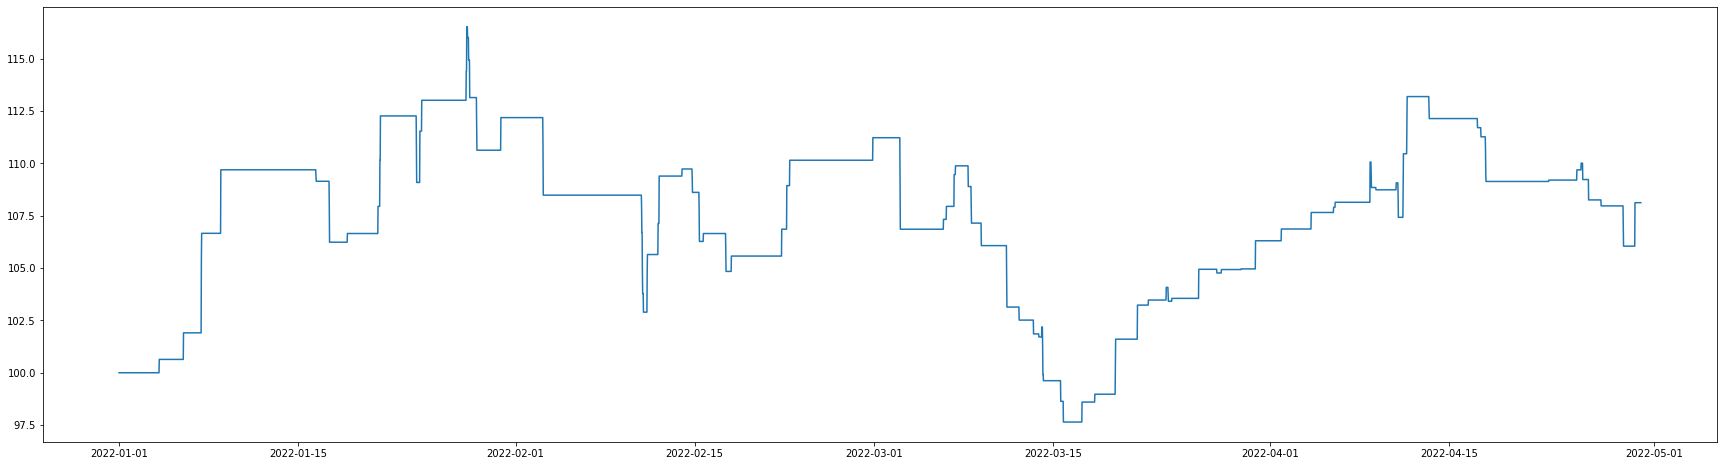

In [18]:
if reinvest_profit_flag == True:
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.plot(budget_dict['time'], budget_dict['budget'])
else:
    print("Not reinvest profit")

In [19]:
if reinvest_profit_flag == True:
    print(f"Max drawdown: {round(max_drawdown * 100, 2)}%")

Max drawdown: 8.21%


In [20]:
win_rate = len(transaction_df[transaction_df['profit'] > 0]) / len(transaction_df)
print(f"Win rate: {round(win_rate * 100, 2)}%")

Win rate: 46.15%


In [21]:
for symbol in transaction_df['symbol'].unique():
    symbol_df = transaction_df[transaction_df['symbol'] == symbol]
    win_rate = len(symbol_df[symbol_df['profit'] > 0]) / len(symbol_df)
    print(f"{symbol} win rate: {round(win_rate * 100, 2)}%")

ETH-PERP win rate: 33.33%
LUNA-PERP win rate: 56.82%
SOL-PERP win rate: 50.0%


In [22]:
print(f"Distribution")
print(pd.DataFrame(transaction_df['profit_percent'].describe()))

Distribution
       profit_percent
count      130.000000
mean        -0.182596
std          3.594593
min         -8.335690
25%         -2.889587
50%         -0.782825
75%          1.978912
max         11.915476


In [23]:
for symbol in transaction_df['symbol'].unique():
    temp_return = transaction_df[transaction_df['symbol'] == symbol]['profit_percent']
    
    print(f"Distribution {symbol}:")
    print(pd.DataFrame(temp_return.describe()))
    print("\n")

Distribution ETH-PERP:
       profit_percent
count       48.000000
mean        -0.753392
std          2.771692
min         -5.466068
25%         -2.446737
50%         -1.389903
75%          0.633459
max          8.286675


Distribution LUNA-PERP:
       profit_percent
count       44.000000
mean         0.441518
std          4.033852
min         -6.055943
25%         -3.000405
50%          0.654845
75%          3.342442
max         11.915476


Distribution SOL-PERP:
       profit_percent
count       38.000000
mean        -0.184250
std          3.936258
min         -8.335690
25%         -3.855939
50%         -0.031468
75%          1.934518
max          8.742758




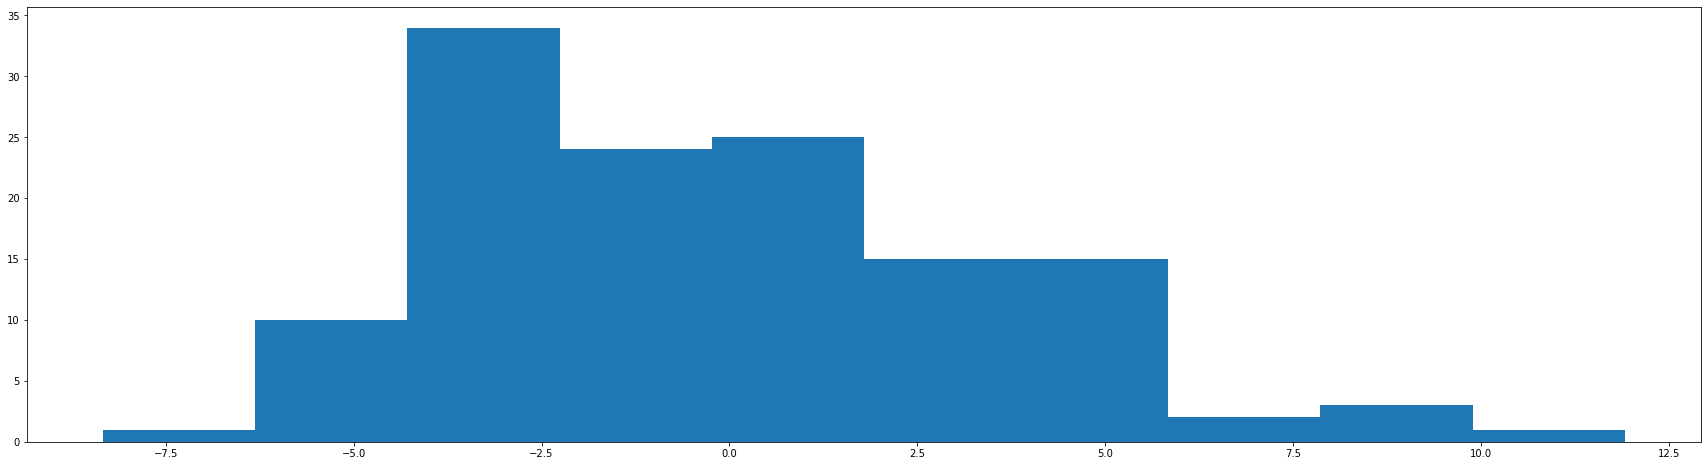

In [24]:
fig, ax = plt.subplots(figsize=(30, 8))
_ = ax.hist(transaction_df['profit_percent'], bins=10)